<a href="https://colab.research.google.com/github/YunaZhu/2025_Intro_Python/blob/main/1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Replicating plots

Hint: For this entire notebook, rather than directly filling out the entire code snippet in one go, we recommend copy-pasting hints line-by-line to progressively replicate the target figure. That way, you can learn by trial-and-error.

**To add a new cell above, press "Escape" and type 'a'**

**To add a new cell below, press "Escape" and type 'b'**

**To delete a cell, press Ctrl-M + D**

## Exercise 1: Replicating Plots using `Matplotlib` and `Numpy`

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. There is no need to focus on how this code exactly works. In the end, it will give you some `numpy` arrays, which you will use in your plots.

This exercise should be done using **only `numpy` and `matplotlib`**.

### Part I: Line and Contour Plots to Visualize Global Temperature Data
The temperature data are from the [NCEP/NCAR atmospheric reanalysis 1](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html).

In [2]:
# We'll need to load the data from the UNIL sharepoint using pooch, so let's
# import the library
import pooch
import numpy as np
import matplotlib.pyplot as plt

# In order to keep our code concise and readable, we'll use a variable that
# stores the common part of the URL where the data is hosted. Then, we'll store
# the full URL for each file in its own variable
base_url = 'https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/'
lon_url =  f'{base_url}EQtSkmHdXlZAuZcDljeHXuMBIVGfXP4lkR56RX6vuCDh1Q?download=1'
lat_url =  f'{base_url}EbMAwn26etZPjxw4F3akRt8BmPef3PMQPn751e6tF0Xi-Q?download=1'
temp_url = f'{base_url}EfUOMGrJNtVMgJUtfP9137sB9d64M_osBRPa0iQRSCHKGg?download=1'

# Let's go ahead and cache each file
lon_filename  = pooch.retrieve(lon_url,
                               known_hash='eaf54b88dd89279d3034da17fe8470dc2c841bf9fa89b2aa741dacff9c326cdb'
                               )

lat_filename  = pooch.retrieve(lat_url,
                               known_hash='af1f438080460e1fca4583b2ec19b44285a3d3776e4d21b8da9b6e162906c88a'
                               )
temp_filename = pooch.retrieve(temp_url,
                               known_hash='e040ca257334708b43e86398e09a5669fcf051179ecf5dcd278f758d67beed20'
                               )

# And then load each file into a numpy array. You can now use these variables
# to continue with the exercise :)
lon = np.load(lon_filename)
lat = np.load(lat_filename)
temp = np.load(temp_filename)

Below is the figure to replicate using the `numpy` variables `temp`, `lon`, and `lat`.

Hint 1: Zonal-mean is synonymous with longitudinal-mean, i.e. the mean must be taken along the `axis` corresponding to `lon`.

Hint 2: To create subplots of different sizes, consider reading the [`plt.subplots` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

Hint 3: For the left subplot, check out the [2D Plotting Methods section](#2D_Plotting_Methods).

Hint 4: For the right subplot, check out the [Label, Ticks, and Gridlines subsection](#Label).

Hint 5: Don't spend too too much time making your figure perfect as there is still a lot of ground to cover in the next notebooks 😀

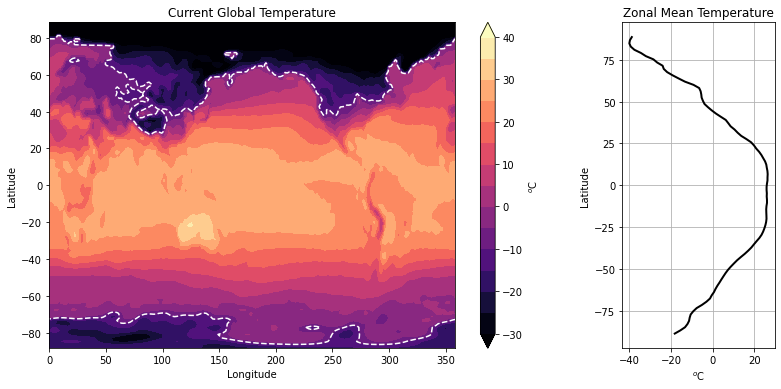

In [3]:
lon.shape

(192,)

In [4]:
lat.shape

(94,)

In [5]:
mask = (tempc == 0.0)
mask

NameError: name 'tempc' is not defined

In [6]:
tempc[mask].shape

NameError: name 'tempc' is not defined

In [7]:
np.mean(temp, axis=1).shape

(94,)

/tmp/ipython-input-876372554.py:6: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax1.contour(lon,lat,temp_celsius>-10,cmap='gist_yerg',levels=np.linspace(-30,40,15),extend='both', linestyle='dotted')
/tmp/ipython-input-876372554.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


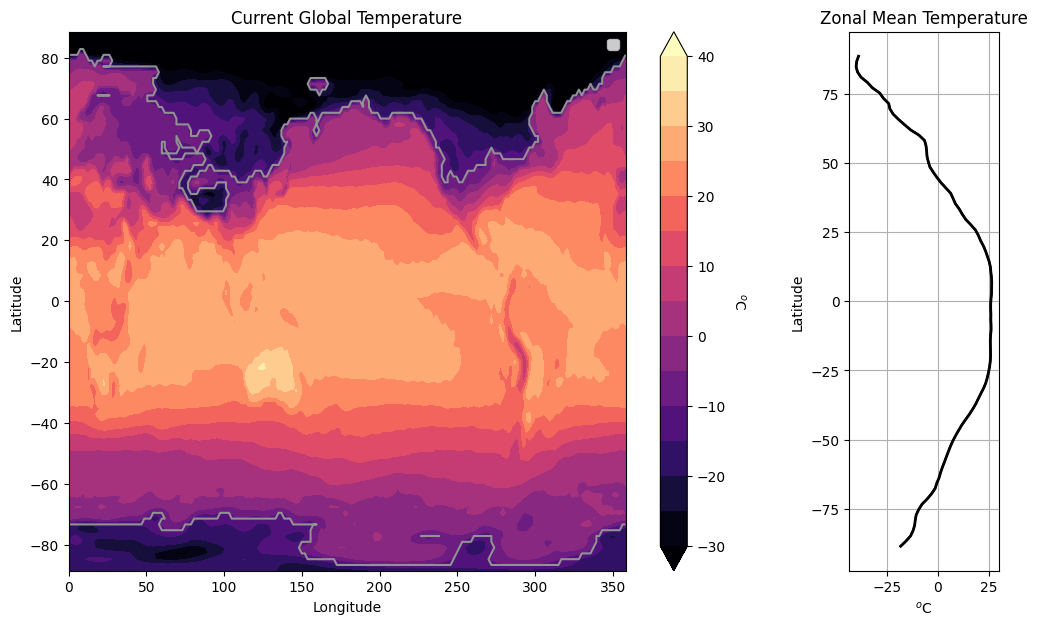

In [8]:
# Replicate this figure
# Temperature values are originally in Kelvin units -> Convert to degree celsius by subtracting 273.15
temp_celsius=temp-273.15
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,7),gridspec_kw={'width_ratios': [7, 1.5]})
ctemp = ax1.contourf(lon,lat,temp_celsius,cmap='magma',levels=np.linspace(-30,40,15),extend='both')
ax1.contour(lon,lat,temp_celsius>-10,cmap='gist_yerg',levels=np.linspace(-30,40,15),extend='both', linestyle='dotted')
ax2.plot(np.mean(temp_celsius,axis=1),lat,c='k')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Current Global Temperature')
ax1.legend()
cbar=fig.colorbar(ctemp)
cbar.set_label('$^o$C', rotation=270, labelpad=15)
ax2.plot(np.mean(temp_celsius,axis=1),lat,lw=2,c='k')
ax2.set_xlabel(r'$^{o}$C') # $ $ for math equation, ^o is the exponent of C
ax2.set_ylabel(r'Latitude')
ax2.set_title('Zonal Mean Temperature')
plt.grid()
plt.show()

### Part II: Scatter Plots to Visualize Earthquake Data
Here, we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by `log10(depth)` and adjust the marker size to be `magnitude`

In [9]:
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg?download=1",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg' to '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg.unzip'


Below is the figure to replicate using the `numpy` variables `earthquake`, `depth`, `magnitude`, `latitude`, and `longitude`.

Hint: Check out the [Scatter Plots subsection](#Scatter) and consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).

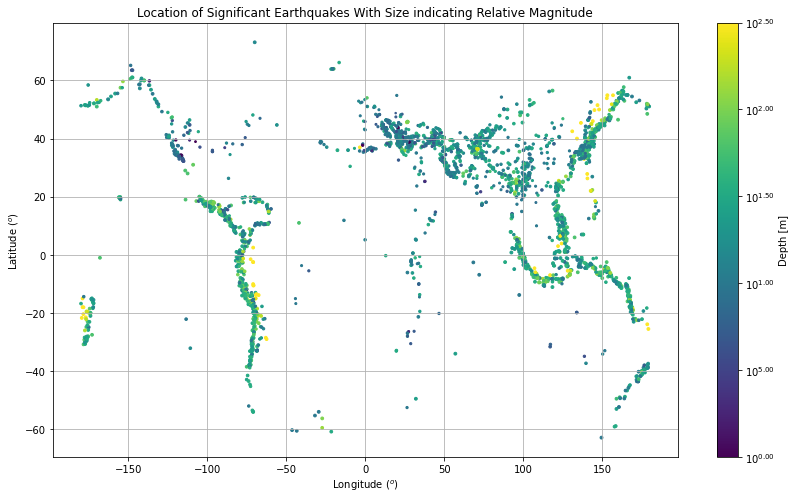

In [10]:
# This is the function to the set the ticks in the colorbar to be in scientific notations.
# You can directly use this function and don't need to change anything in this cell.
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(a)

In [11]:
earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

In [12]:
earthquakes.shape

(5959, 47)

In [13]:
type(depth)

numpy.ndarray

In [14]:
depth.shape

(5959,)

In [19]:
print(depth[:100])

[ nan  nan  18.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan 100.  nan  nan  nan  nan  20. 100.  nan
  nan  nan  nan  nan  nan  nan  nan 100.  nan  20.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  18.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 100.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan]


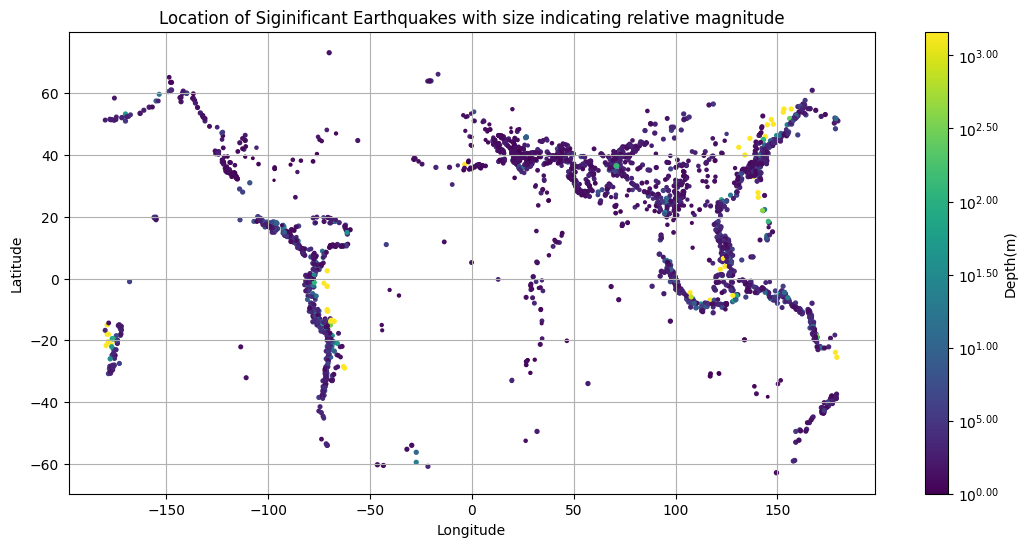

In [25]:
# Replicate the figure here
fig,axe = plt.subplots(ncols=1,nrows=1, figsize=(13,6))
ctemp=axe.scatter(longitude,latitude,s=(magnitude),c=np.array(depth),marker='o',cmap='viridis',vmin=0,vmax=10**2.5) # c=color, vmin and vmax for value clipping
axe.set_xlabel('Longitude')
axe.set_ylabel('Latitude')
axe.set_title('Location of Siginificant Earthquakes with size indicating relative magnitude')
fig.colorbar(ctemp,ax=axe,label='Depth(m)',format=ticker.FuncFormatter(fmt))
plt.grid()
plt.show()

## Exercise 2: Cartopy

The goal of this exercise (congratulations for making it that far!! 😃) is to replicate the figures you see as closely as possible.

### Part I: Antarctic Sea Ice

**Q1) Download the file below and use it to plot the concentration of Antarctic Sea Ice.**

Try to recreate the plot below.

Hint: Explore the file contents in order to determine the correct projection.

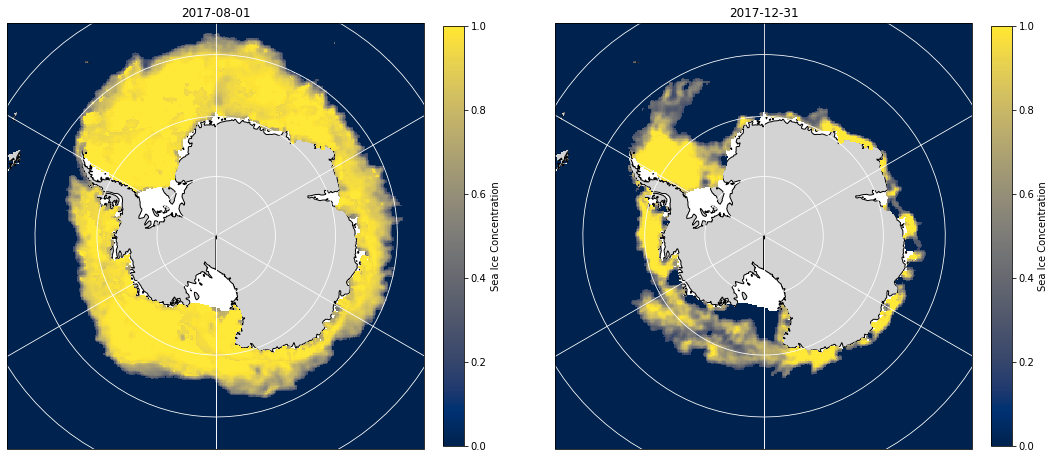

In [26]:
!pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shapely: filename=Shapely-1.6.4-py2.py3-none-any.whl size=155973 sha256=90488d2a86cea56bac0be4bdd866257b662bafc7b4806f7aebc3bd1d936f486e
  Stored in directory: /root/.cache/pip/wheels/04/48/f8/49eb7815e85eaf1ec42a8acdf38f1266b27eaedbcf527db25d
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.2
    Uninstalling shapely-2.1.2:
      Successfully uninstalled shapely-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.13.0 requires shapely>=2.0.1, but you have shapely 1.6.4 which is incompatible.
geopandas 1.1.1 requires shapely>=2.0.0, but you have shapely 1.6.4 which is incompatible.
bigframes 2.23.0 requires shapely>=1.8.5, but you have shapely 1.6.4 which

In [27]:
!pip install netCDF4
import pooch
import cartopy
import cartopy.crs as ccrs
#import xarray as xr
from netCDF4 import Dataset
######################################################################################################################################################
# Download Sea Ice files
url1 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EREWA38Rs-FFslQd4yKZBAsBF8m9yLzeJKEAN5gSz7LLFw?download=1"
fname1 = pooch.retrieve(url1, known_hash='1ff50bca1e6249a9b2fcd9d9466e31bdb5be650243f99c7319ab2ce625b87ce7')
url2 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/Ea_2umrDTkhCrN--th4nuokBMcnVlxGshiyUq2eSpvhlTQ?download=1"
fname2 = pooch.retrieve(url2, known_hash='309418969ad09f42b8104589bcb86de4ed353a5742fef9385baec174c7d55e66')
######################################################################################################################################################
# Run these as is. We are reading the sea ice concentration values from our files
seaice1,seaice2 = Dataset(fname1,'r'),Dataset(fname2,'r')
var_toplot1,var_toplot2 = seaice1.variables['seaice_conc_cdr'][:],seaice2.variables['seaice_conc_cdr'][:]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 88.5 MB/s eta 0:00:00


In [36]:
seaice2.variables["longitude"][:].shape

(332, 316)

In [37]:
seaice2.variables["latitude"][:].shape

(332, 316)

In [38]:
seaice2["projection"]

<class 'netCDF4.Variable'>
|S1 projection()
    grid_boundary_top_projected_y: 4350000.0
    grid_boundary_bottom_projected_y: -3950000.0
    grid_boundary_right_projected_x: 3950000.0
    grid_boundary_left_projected_x: -3950000.0
    parent_grid_cell_row_subset_start: 0.0
    parent_grid_cell_row_subset_end: 332.0
    parent_grid_cell_column_subset_start: 0.0
    parent_grid_cell_column_subset_end: 316.0
    spatial_ref: PROJCS["NSIDC Sea Ice Polar Stereographic South",GEOGCS["Unspecified datum based upon the Hughes 1980 ellipsoid",DATUM["Not_specified_based_on_Hughes_1980_ellipsoid",SPHEROID["Hughes 1980",6378273,298.279411123061,AUTHORITY["EPSG","7058"]],AUTHORITY["EPSG","6054"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4054"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-70],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PAR

In [48]:
np.ma.masked_greater(var_toplot1.data,1)

masked_array(
  data=[[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]]],
  mask=[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],
  fill_value=np.float64(1e+20),
  dtype=float32)

AttributeError: NetCDF: Attribute not found

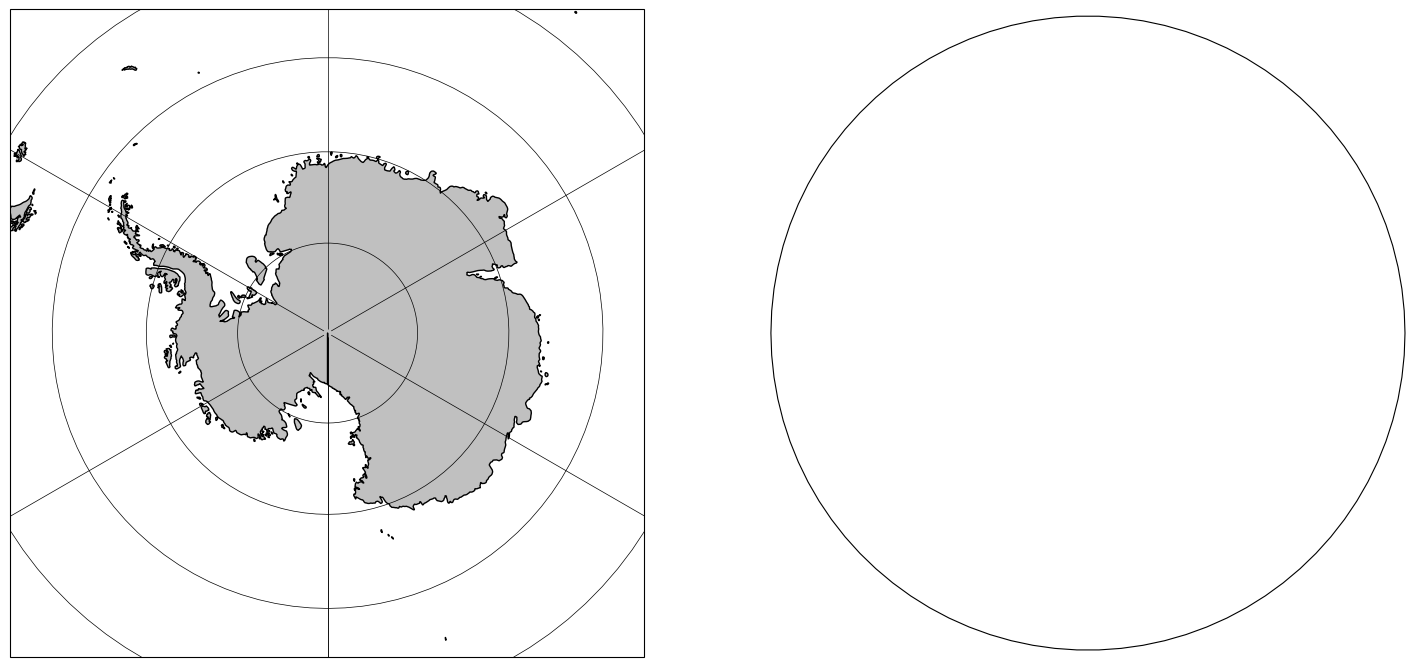

In [52]:
import matplotlib.pyplot as plt
#import cartopy.feature as cfeature
import numpy as np

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 12),subplot_kw={'projection': ccrs.SouthPolarStereo()})
# The rest doesn't change:
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land and gridlines
# Hint: Check edgecolor to show coast, and facecolor to color the continent
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax[0].add_feature(cartopy.feature.LAND, edgecolor='k',facecolor='silver')
ax[0].gridlines(lw=0.5,color='k')
######################################################################################################################################################
# Add Contours
# Hint: X (Y) data in the pcolormesh should be the longitude and latitude of the sea ice data.
# Hint: Check the shape of the var_toplot1, var_toplot2 before plotting
# Hint: longitude and latitude can be accessed with seaice1.variables['longitude'][:], seaice1.variables['latitude'][:]
# Hint: Check this website: https://matplotlib.org/stable/tutorials/colors/colormaps.html for available colormaps
######################################################################################################################################################
sea_ice1 = ax[0].pcolormesh(seaice1.variable['longitude'][:], seaice1.variables['latitude'][:], np.ma.masked_greater(var_toplot1[0,:,:],1), transform=ccrs.PlateCaree(),vmin=0,vmax=1,cmap='Spectral')
plt.colorbar(sea_ice1,ax=ax[0],fraction=0.046, pad=0.04,label='Sea Ice concentration')
#ax[0].set_title('2017-08-01')


#ax[1].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
#ax[1].add_feature(cartopy.feature.Land, edgecolor='k',facecolor='silver')
#ax[1].gridlines(lw=0.5,color='k')

#sea_ice2 = ax[1].pcolormesh(seaice2.variable['longitude'][:], seaice2.variables['latitude'][:], np.ma.masked_greater(var_toplot2[1],1), transform=SouthPolarStereo,vmin=0,vmax=1,cmap='Spectral')
#plt.colorbar(sea_ice2,ax=ax[1],label='Sea Ice concentration',fraction=0.046, pad=0.04)
#ax[1].set_title('2017-12-31')
plt.show()

### Part II: 2014 Earthquakes
**Q2) Download the file below and use it to plot the location of >4 Richter Scale earthquakes in the US during 2014.**

Hint: Explore the file contents in order to determine the correct projection.

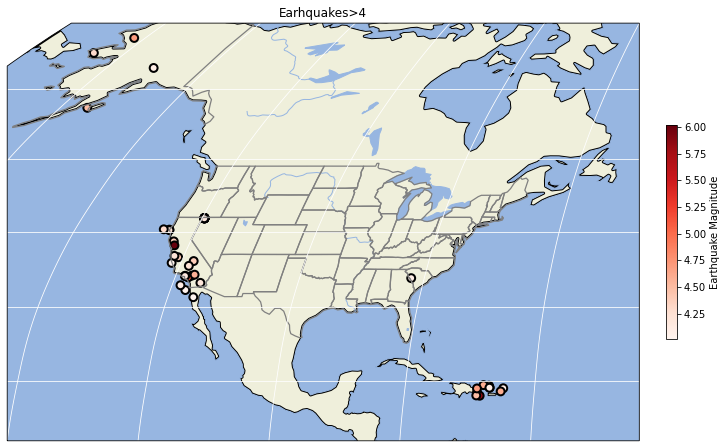

In [54]:
import pandas as pd
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Ea9h1j2_wYpEtuX5waZZWpsBt2zh3lvGUBFisvA8dFG5Eg?download=1",
    known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')
usgs_2014 = pd.read_csv(fname)

In [55]:
######################################################################################################################################################
# Run these as is. We are removing missing values in the data and filter data points with stronger earthquakes (magnitude > 4)
usgs_2014_nonan = usgs_2014.dropna()
usgs_2014_large = usgs_2014_nonan[usgs_2014_nonan['mag']>4]

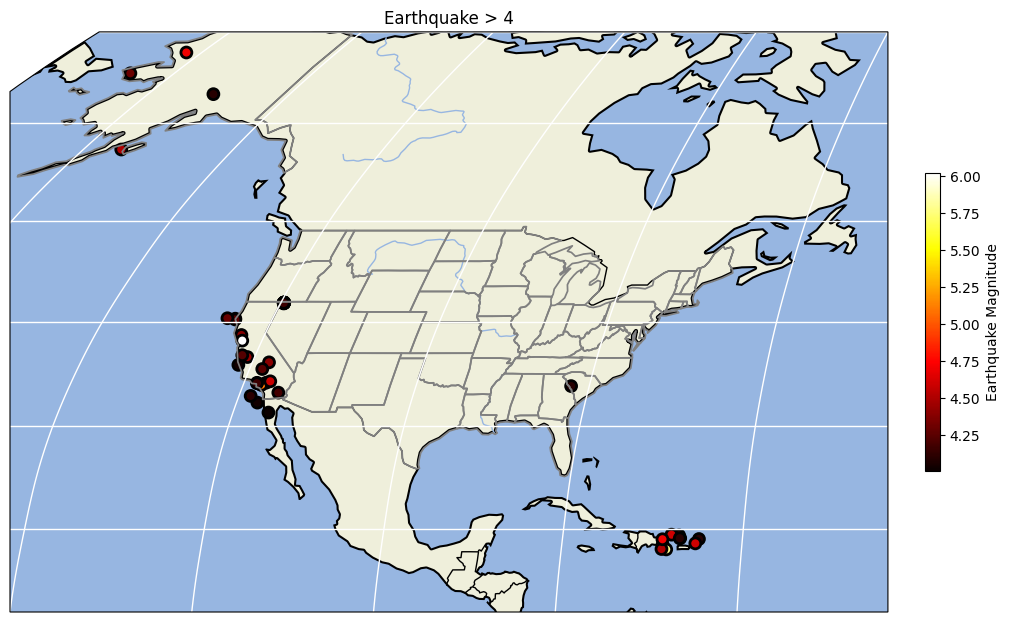

In [58]:
fig,ax = plt.subplots(1,1,figsize=(12, 12),subplot_kw={'projection': ccrs.Robinson()})
# The rest doesn't change:
ax.set_extent([-140, -60, 12,70], ccrs.PlateCarree())

######################################################################################################################################################
# Add Land, Ocean, Rivers, and State Lines
# Hint: Land linewidth = 3; States: edgecolor='gray',linewidth=1.25; lakes/ocean/rivers: no change
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
ax.add_feature(cartopy.feature.LAND, edgecolor='k',linewidths=3)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.STATES,edgecolor='gray',linewidth=1.25)
ax.gridlines(lw=1,color='white')

######################################################################################################################################################
# Add Scatter points for earthquake data
# Hint: usgs_2014_large['longitude'] to access logitude data, usgs_2014_large['latitude'] to access latitude data, usgs_2014_large['mag'] to access Earthquake magnitudes
# Hint: https://matplotlib.org/stable/gallery/color/named_colors.html for the names of the colors available
######################################################################################################################################################
earthquake_data = ax.scatter(usgs_2014_large['longitude'],usgs_2014_large['latitude'],s=62,c=usgs_2014_large['mag'],marker='o',cmap='hot',edgecolors='k',linewidths=2, transform=ccrs.PlateCarree())
plt.colorbar(earthquake_data,ax=ax,fraction=0.016, pad=0.04,label='Earthquake Magnitude')
ax.set_title('Earthquake > 4')
plt.show()

In [ ]:
s = 'abc123'

In [ ]:
s[1:4]

'bc1'